# Lehrasib Ali 
### CC-OL-40287

# Code Clause
## Golden Project 2
## Personality Prediction System via CV Analysis

**Importing Libraries**

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score , f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC


**Loading Data**

In [83]:
train_data = pd.read_csv(r'.//train.csv')
test_data = pd.read_csv(r'.//test.csv')
print(train_data.head())
print(test_data.head())


   Gender  Age  openness  neuroticism  conscientiousness  agreeableness  \
0    Male   17         7            4                  7              3   
1    Male   19         4            5                  4              6   
2  Female   18         7            6                  4              5   
3  Female   22         5            6                  7              4   
4  Female   19         7            4                  6              5   

   extraversion Personality (Class label)  
0             2               extraverted  
1             6                   serious  
2             5                dependable  
3             3               extraverted  
4             4                    lively  
   Gender  Age  openness  neuroticism  conscientiousness  agreeableness  \
0  Female   20         7            9                  9              5   
1    Male   17         5            4                  5              2   
2  Female   25         5            5                  7    

**Checking Missing Values**

In [84]:
missing_values_train = train_data.isnull().sum()
print("Missing values in training data:")
print(missing_values_train)

missing_values_test = test_data.isnull().sum()
print("\nMissing values in test data:")
print(missing_values_test)

Missing values in training data:
Gender                       0
Age                          0
openness                     0
neuroticism                  0
conscientiousness            0
agreeableness                0
extraversion                 0
Personality (Class label)    0
dtype: int64

Missing values in test data:
Gender                       0
Age                          0
openness                     0
neuroticism                  0
conscientiousness            0
agreeableness                0
extraversion                 0
Personality (class label)    0
dtype: int64


## Data Analysis and Exploration

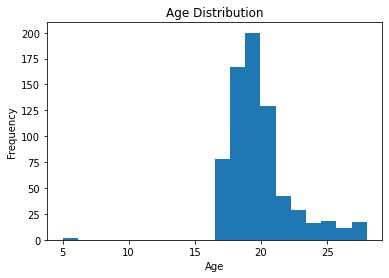

In [85]:
import matplotlib.pyplot as plt

# Histogram of Age
plt.hist(train_data['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


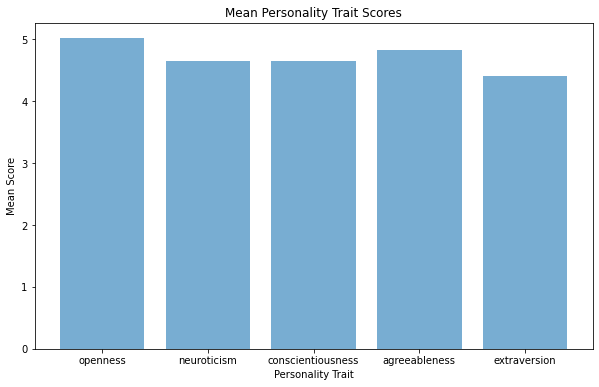

In [86]:
# Bar plot of Personality Traits
personality_traits = ['openness', 'neuroticism', 'conscientiousness', 'agreeableness', 'extraversion']
plt.figure(figsize=(10, 6))
plt.bar(personality_traits, train_data[personality_traits].mean(), alpha=0.6)
plt.xlabel('Personality Trait')
plt.ylabel('Mean Score')
plt.title('Mean Personality Trait Scores')
plt.show()


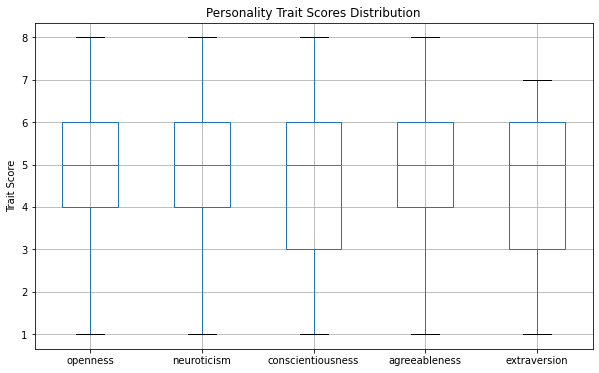

In [87]:
# Box plot of Personality Traits
plt.figure(figsize=(10, 6))
train_data[personality_traits].boxplot()
plt.ylabel('Trait Score')
plt.title('Personality Trait Scores Distribution')
plt.show()

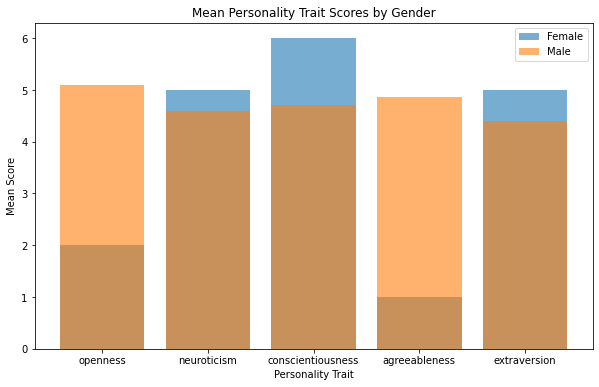

In [88]:
# Bar plot of Personality Traits by Gender
trait_means_by_gender = train_data.groupby('Gender')[personality_traits].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(personality_traits, trait_means_by_gender.iloc[0, 1:], alpha=0.6, label='Female')
plt.bar(personality_traits, trait_means_by_gender.iloc[1, 1:], alpha=0.6, label='Male')
plt.xlabel('Personality Trait')
plt.ylabel('Mean Score')
plt.title('Mean Personality Trait Scores by Gender')
plt.legend()
plt.show()


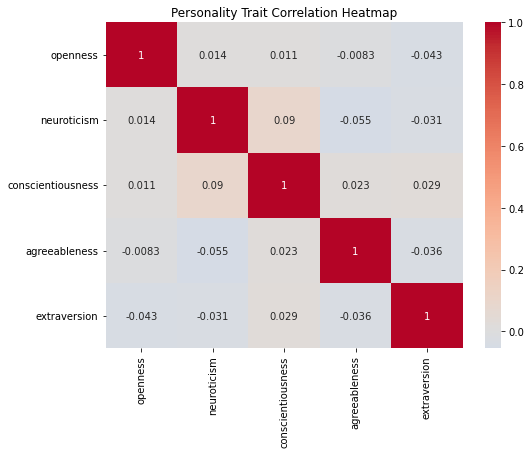

In [89]:
# Correlation matrix
correlation_matrix = train_data[personality_traits].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Personality Trait Correlation Heatmap')
plt.show()


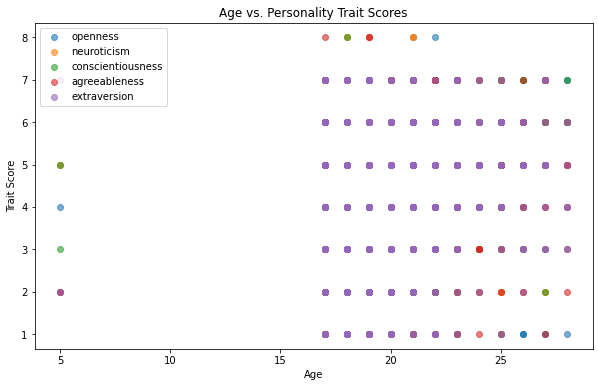

In [90]:
# Scatter plot: Age vs. Personality Trait
plt.figure(figsize=(10, 6))
for trait in personality_traits:
    plt.scatter(train_data['Age'], train_data[trait], alpha=0.6, label=trait)
plt.xlabel('Age')
plt.ylabel('Trait Score')
plt.title('Age vs. Personality Trait Scores')
plt.legend()
plt.show()


**Data Preprocessing**

In [91]:
# Convert 'Gender' to numerical using LabelEncoder
label_encoder = LabelEncoder()
train_data['Gender'] = label_encoder.fit_transform(train_data['Gender'])
test_data['Gender'] = label_encoder.transform(test_data['Gender'])

**Feature Selection for Testing and Training Data**

In [92]:
# Separate features and target variable for training data
X_train = train_data.drop(columns=['Personality (Class label)'])
y_train = train_data['Personality (Class label)']

# Separate features and target variable for testing data
X_test = test_data.drop(columns=['Personality (class label)'])
y_test = test_data['Personality (class label)']

## **Loading & Fitting Different Models**

**Random Forest**

In [93]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.30793650793650795
Classification Report:
              precision    recall  f1-score   support

  dependable       0.14      0.38      0.21        21
 extraverted       0.38      0.38      0.38        77
      lively       0.08      0.17      0.11        24
 responsible       0.27      0.30      0.29        40
     serious       0.49      0.29      0.36       153

    accuracy                           0.31       315
   macro avg       0.27      0.30      0.27       315
weighted avg       0.38      0.31      0.33       315



**Support Vector Classifier SVC**

In [94]:
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)
# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6888888888888889
Classification Report:
              precision    recall  f1-score   support

  dependable       0.22      0.10      0.13        21
 extraverted       0.72      0.65      0.68        77
      lively       0.83      0.21      0.33        24
 responsible       1.00      0.30      0.46        40
     serious       0.68      0.97      0.80       153

    accuracy                           0.69       315
   macro avg       0.69      0.44      0.48       315
weighted avg       0.71      0.69      0.65       315



**Applying Hypermeter Tuning**

In [95]:
from sklearn.model_selection import GridSearchCV
model = SVC(random_state=42)

# Define the hyperparameters to search through
param_grid = {
    'C': [0.1, 1, 10, 100],        # Regularization parameter
    'kernel': ['linear', 'rbf'],   # Kernel types to try
}

# Step 4: Perform Grid Search for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Step 5: Get the best hyperparameters found by Grid Search
best_params = grid_search.best_params_

# Step 6: Train the model with the best hyperparameters
best_model = SVC(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Step 7: Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'C': 100, 'kernel': 'rbf'}
Accuracy: 0.42857142857142855
Classification Report:
              precision    recall  f1-score   support

  dependable       0.07      0.10      0.08        21
 extraverted       0.45      0.32      0.38        77
      lively       0.16      0.21      0.18        24
 responsible       0.44      0.17      0.25        40
     serious       0.52      0.63      0.57       153

    accuracy                           0.43       315
   macro avg       0.33      0.29      0.29       315
weighted avg       0.44      0.43      0.42       315

